In [234]:
# Imports
import scipy.io
import h5py
import time
# Package used for loading data from the input h5 file
from h5py import File
import matplotlib.pyplot as plt
import numpy as np

In [7]:
path_data_eeg = '/Users/obando_c/Documents/Neuro/EmergencyBreaking/Data/EEG/'
file_name = "VPae.mat"

In [94]:
start = time.time()
with h5py.File(path_data_eeg + file_name, 'r') as f:
    print("Number of tests in VPae:", len(list(f)))
    print("Items inside VPae:", list(f.items()))
    cnt = f.get('cnt')
    print("Items in cnt", list(cnt.items()) )
    T = np.array(cnt.get('T'))
    clab = np.array(cnt.get('clab')) # clab is the electrode names
    file = np.array(cnt.get('file'))
    fs = np.array(cnt.get('fs')) # fs is the sampling rate
    title = np.array(cnt.get('title'))
    x = np.array(cnt.get('x')) # x is the continuous multivariate data
    
end = time.time()
print("Elapsed time:", (end - start), "s")

Number of tests in VPae: 4
Items inside VPae: [('#refs#', <HDF5 group "/#refs#" (144 members)>), ('cnt', <HDF5 group "/cnt" (6 members)>), ('mnt', <HDF5 group "/mnt" (8 members)>), ('mrk', <HDF5 group "/mrk" (4 members)>)]
Items in cnt [('T', <HDF5 dataset "T": shape (3, 1), type "<f8">), ('clab', <HDF5 dataset "clab": shape (69, 1), type "|O">), ('file', <HDF5 dataset "file": shape (8, 1), type "<u2">), ('fs', <HDF5 dataset "fs": shape (1, 1), type "<f8">), ('title', <HDF5 dataset "title": shape (22, 1), type "<u2">), ('x', <HDF5 dataset "x": shape (69, 1619936), type "<f8">)]
Elapsed time: 6.497153997421265 s


In [229]:
# Extract name of channels 
f = h5py.File(path_data_eeg + file_name,'r') 
test = f['cnt/clab']
name_elec = list()
for j in range(len(test)):
    st = test[j][0]
    obj = f[st]
    str1 = ''.join(chr(i) for i in obj[:])
    name_elec.append(str1)
print("Names of channels:")
print(name_elec)

Names of channels:
['EOGv', 'Fp1', 'Fp2', 'AF3', 'AF4', 'EOGh', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'EMGf', 'lead_gas', 'lead_brake', 'dist_to_lead', 'wheel_X', 'wheel_Y', 'gas', 'brake']


Text(0.5, 1.0, 'Events for subject VPae')

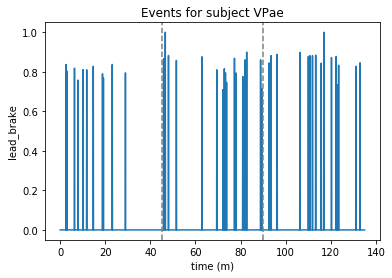

In [226]:
#  Experiments consisted of
# Three blocks (45 min each, marked with grey vertical dash) of driving were conducted with rest periods of 10–15 min in between 
# During these periods, 225 ± 17 critical (emergency braking) situations were artificially induced
lead_brake_index = 63
m = 1000
plt.plot(np.linspace(start = 0, stop = x.shape[1], num =len(x[lead_brake_index,::m]))/200/60, x[lead_brake_index,::m])
plt.axvline(x=45, color='gray', linestyle='--')
plt.axvline(x=90, color='gray', linestyle='--')
plt.xlabel("time (m)")
plt.ylabel("lead_brake")
plt.title('Events subject VPae')

In [244]:
# Find the intervals of events
break_interval = np.where(x[lead_brake_index,:] != 0)[0]
break_point = np.where(np.diff(break_interval)!=1)[0]
print(len(break_point))

226


Text(0.5, 1.0, 'Example of a target segment')

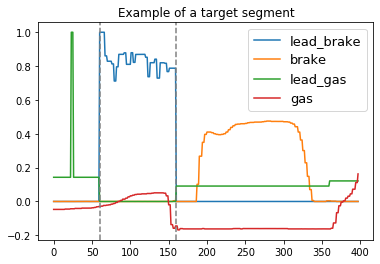

In [225]:
event_index = 0 # Indexx of an event
ts_i = 60 # Target segment interval intial point
ts_f = 240 # Target segment interval intial point
time_break = break_interval[:break_point[event_index]]
plt.plot(x[lead_brake_index,time_break[0]-ts_i:time_break[-1]+ts_f], label="lead_brake")
plt.plot(x[68,time_break[0]-ts_i:time_break[-1]+ts_f], label = "brake")
plt.plot(x[62,time_break[0]-ts_i:time_break[-1]+ts_f], label="lead_gas")
plt.plot(x[67,time_break[0]-ts_i:time_break[-1]+ts_f], label = "gas")
#plt.plot(x[61,time_break[0]-ts_i:time_break[-1]+ts_f], label = "EMGf")
plt.axvline(x=ts_i, color='gray', linestyle='--')
plt.axvline(x=ts_i+break_point[event_index], color='gray', linestyle='--')
plt.legend(fontsize=13)
plt.title("Example of a target segment")

In [228]:
len(break_point)

226

In [ ]:
for event_index in range(len(break_point)-1):
    

In [31]:
# In each file, there is a cnt structure containing the data, 
# an mnt structure defining electrode positions, 
# and an mrk structure containing the braking event.
h5_object = File(path_data_eeg + file_name)
f = h5py.File(path_data_eeg + file_name, 'r')

In [10]:
# Keys list (.h5 hierarchy ground level)
list(h5_object.keys())

['#refs#', 'cnt', 'mnt', 'mrk']

In [32]:
list(f.keys())

['#refs#', 'cnt', 'mnt', 'mrk']

In [33]:
dset = f['cnt']

In [35]:
type(dset)

h5py._hl.group.Group

In [11]:
h5_group = h5_object.get('#refs#')
print ("Second hierarchy level: " + str(list(h5_group)))
print(len(list(h5_group)))

Second hierarchy level: ['0', '0b', '1', '1b', '2', '2b', '3', '3b', '4', '4b', '5', '5b', '6', '6b', '7', '7b', '8', '8b', '9', '9b', 'A', 'Ab', 'B', 'Bb', 'C', 'Cb', 'D', 'Db', 'E', 'Eb', 'F', 'Fb', 'G', 'Gb', 'H', 'Hb', 'I', 'Ib', 'J', 'Jb', 'K', 'Kb', 'L', 'Lb', 'M', 'Mb', 'N', 'Nb', 'O', 'Ob', 'P', 'Pb', 'Q', 'Qb', 'R', 'Rb', 'S', 'Sb', 'T', 'Tb', 'U', 'Ub', 'V', 'Vb', 'W', 'Wb', 'X', 'Xb', 'Y', 'Yb', 'Z', 'Zb', 'a', 'ab', 'ac', 'b', 'bb', 'bc', 'c', 'cb', 'cc', 'd', 'db', 'dc', 'e', 'eb', 'ec', 'f', 'fb', 'fc', 'g', 'gb', 'gc', 'h', 'hb', 'hc', 'i', 'ib', 'ic', 'j', 'jb', 'jc', 'k', 'kb', 'kc', 'l', 'lb', 'lc', 'm', 'mb', 'mc', 'n', 'nb', 'nc', 'o', 'ob', 'oc', 'p', 'pb', 'pc', 'q', 'qb', 'qc', 'r', 'rb', 'rc', 's', 'sb', 'sc', 't', 'tb', 'tc', 'u', 'ub', 'v', 'vb', 'w', 'wb', 'x', 'xb', 'y', 'yb', 'z', 'zb']
144


In [27]:
h5_group = h5_object.get('cnt')
print ("Second hierarchy level: " + str(list(h5_group)))
mv_data = h5_group.get('x') # multivariate data
sampl_rate = h5_group.get('fs') # sampling_rate
elec_names = h5_group.get('clab') # sampling_rate

Second hierarchy level: ['T', 'clab', 'file', 'fs', 'title', 'x']


In [28]:
mv_data.shape

(69, 1619936)

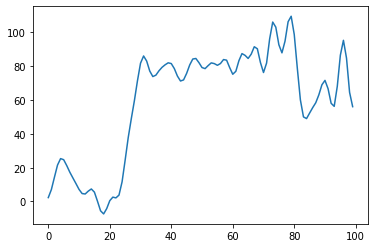

In [26]:
plt.plot(mv_data[1,:100])

In [17]:
h5_group = h5_object.get('mnt')
print ("Second hierarchy level: " + str(list(h5_group)))

Second hierarchy level: ['box', 'box_sz', 'clab', 'pos_3d', 'scale_box', 'scale_box_sz', 'x', 'y']


In [18]:
h5_group = h5_object.get('mrk')
print ("Second hierarchy level: " + str(list(h5_group)))

Second hierarchy level: ['className', 'event', 'time', 'y']


In [238]:
start = time.time()
with h5py.File(path_data_eeg + file_name, 'r') as f:
    mrk = f.get('mrk')
    print("Items in mrk", list(mrk.items()) )
    className = np.array(mrk.get('className'))
    event = mrk.get('event') # 
    print("Items in event", list(event.items()) )
    react = event.get('react')
    time_mrk = np.array(mrk.get('time')) # mrk.time is the timestamp for each event in milliseconds
    y = np.array(mrk.get('y')) # mrk.y is a binary matrix telling which of the five types each event is
    
end = time.time()
print("Elapsed time:", (end - start), "s")

Items in mrk [('className', <HDF5 dataset "className": shape (5, 1), type "|O">), ('event', <HDF5 group "/mrk/event" (1 members)>), ('time', <HDF5 dataset "time": shape (914, 1), type "<f8">), ('y', <HDF5 dataset "y": shape (914, 5), type "<f8">)]
Items in event [('react', <HDF5 dataset "react": shape (1, 914), type "<f8">)]
Elapsed time: 0.004491090774536133 s


In [250]:
# Extract className
f = h5py.File(path_data_eeg + file_name,'r') 
test = f['mrk/className']
className = list()
for j in range(len(test)):
    st = test[j][0]
    obj = f[st]
    str1 = ''.join(chr(i) for i in obj[:])
    className.append(str1)
print("Class names:")
print(className)

Class names:
['car_normal', 'car_brake', 'car_hold', 'car_collision', 'react_emg']


In [252]:
sum(y[:,1])

227.0